In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy.linalg as linalg

import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [19]:
df = pd.read_csv('../../data/data_preprocessed.csv')
df_ = df.drop(['Potability', 'Unnamed: 0'], axis=1)
df_
df_labels = pd.read_csv('../../data/data_preprocessed.csv')
df_.isnull().all()

ph                 False
Hardness           False
Solids             False
Chloramines        False
Sulfate            False
Conductivity       False
Organic_carbon     False
Trihalomethanes    False
Turbidity          False
Potability_det     False
dtype: bool

In [20]:
df_

ph    Hardness        Solids  Chloramines     Sulfate  \
0      7.080795  219.674262  22210.613083     5.875041  333.775777   
1      6.783888  193.653581  13677.106441     5.171454  323.728663   
2      6.010618  184.558582  15940.573271     8.165222  421.486089   
3      8.097454  218.992436  18112.284447     6.196947  333.775777   
4      8.072612  210.269780  16843.363927     8.793459  359.516169   
...         ...         ...           ...          ...         ...   
2288   8.124208  207.509515  26489.114701     8.540837  318.059624   
2289  10.391942  262.741770  39116.682706     3.205786  285.728420   
2290   7.790875  196.478712  24061.349596     6.785685  350.117254   
2291   6.139743  168.444214  23894.136010     9.494582  318.026087   
2292   7.080795  143.300200  16263.167465     6.229737  333.775777   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability_det  
0       398.517703       11.502316       112.412210   2.994259               0  
1       477.854687       15.056064        66.396293   3.250022               1  
2       314.529813       20.314617        83.707938   4.867287               0  
3       376.569803       17.746264        59.909941   4.279082               1  
4       559.167574       17.263576        68.738989   5.082206               0  
...            ...             ...              ...        ...             ...  
2288    431.625677       10.075598        63.984225   4.724457               0  
2289    473.313969       13.300688        65.318816   5.771715               0  
2290    471.518536       15.343316        44.544627   3.076214               1  
2291    494.129125       19.116022        60.264767   3.841222               0  
2292    503.664085       19.585497        66.396293   3.451740               0  

[2293 rows x 10 columns]

In [21]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2293 non-null   float64
 1   Hardness         2293 non-null   float64
 2   Solids           2293 non-null   float64
 3   Chloramines      2293 non-null   float64
 4   Sulfate          2293 non-null   float64
 5   Conductivity     2293 non-null   float64
 6   Organic_carbon   2293 non-null   float64
 7   Trihalomethanes  2293 non-null   float64
 8   Turbidity        2293 non-null   float64
 9   Potability_det   2293 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 179.3 KB


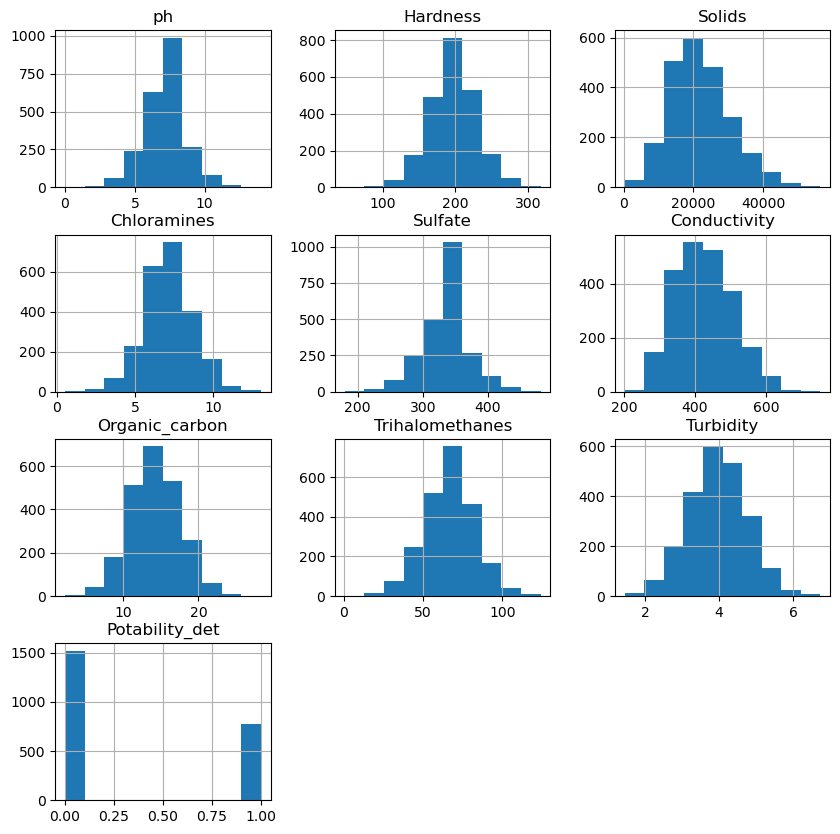

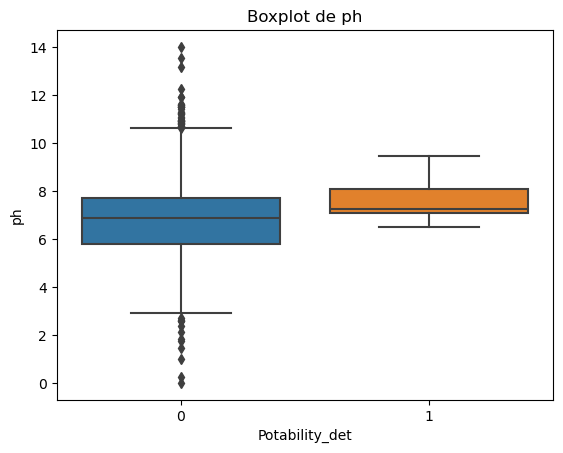

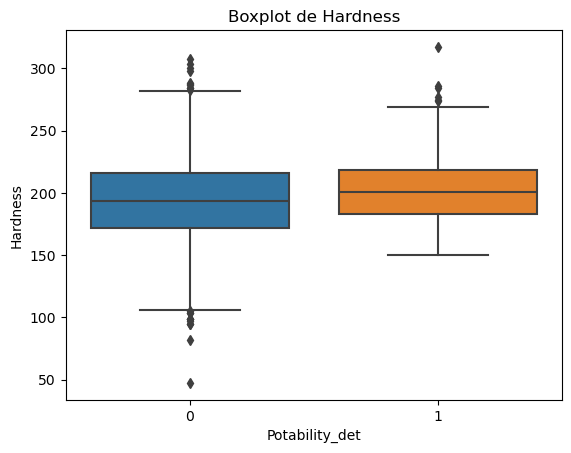

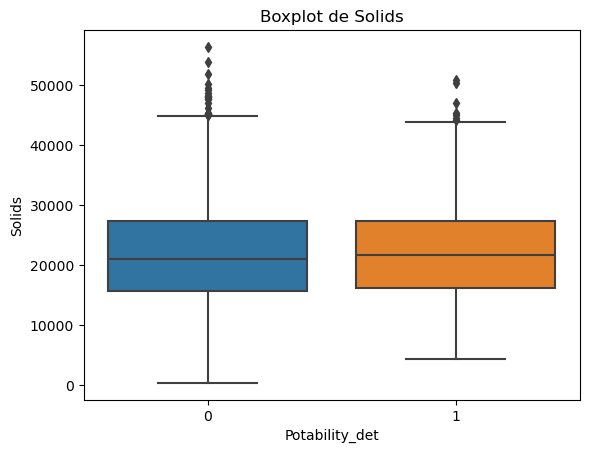

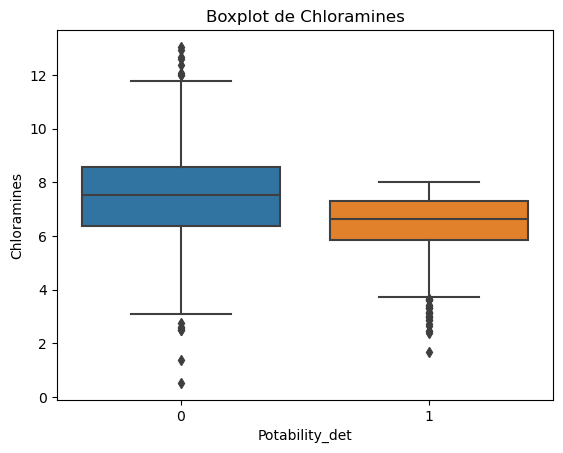

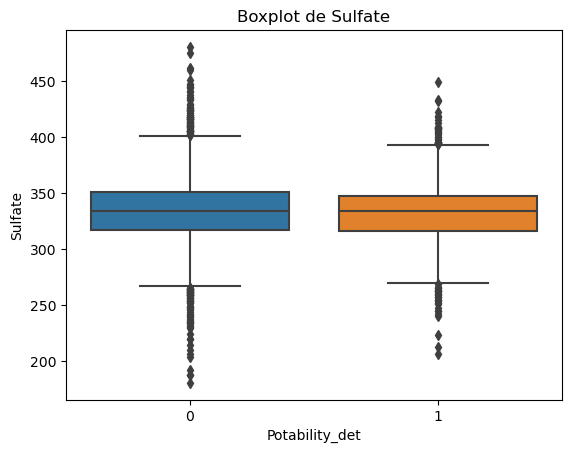

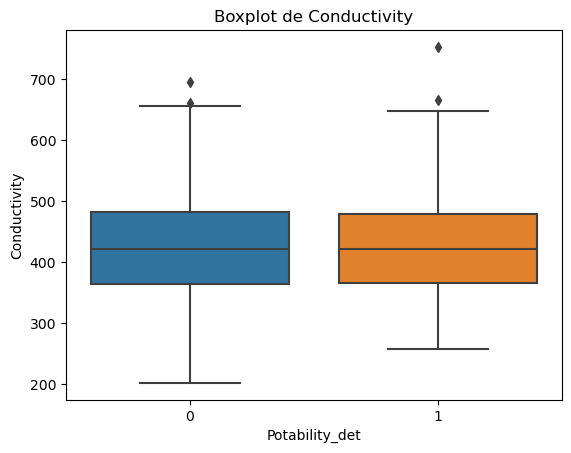

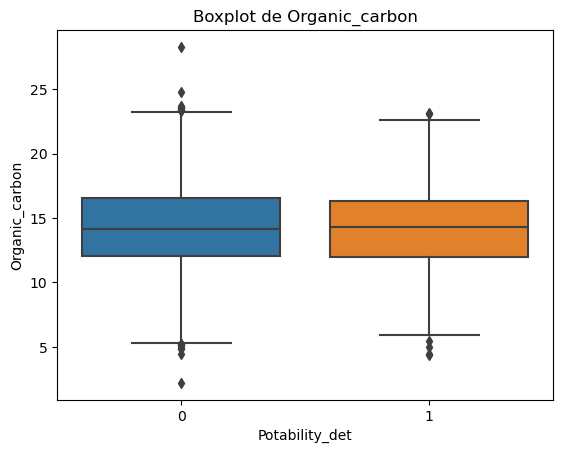

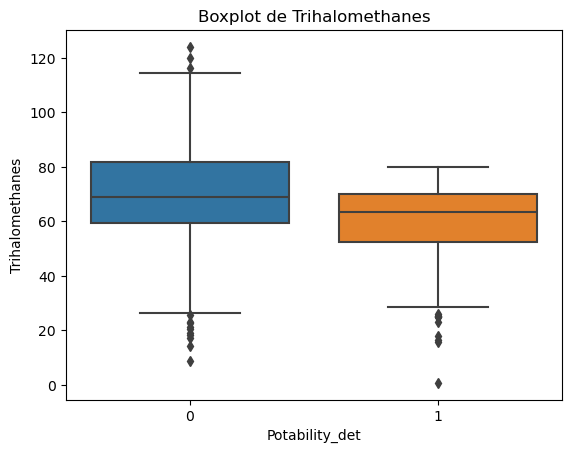

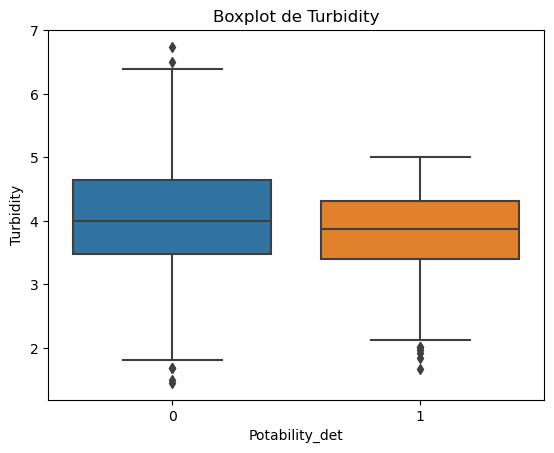

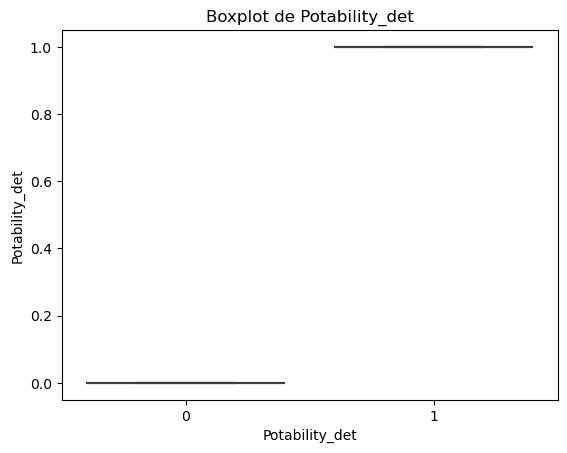

In [22]:
# Histogrammes pour visualiser les distributions
df_.hist(figsize=(10, 10))
plt.show()

# Boîtes à moustaches
for col in df_.columns:
    sns.boxplot(x='Potability_det', y=col, data=df_)
    plt.title(f'Boxplot de {col}')
    plt.show()

<Axes: xlabel='Potability_det', ylabel='count'>

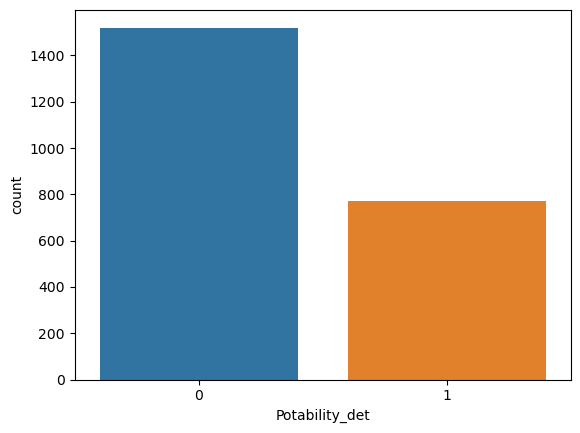

In [23]:
sns.countplot(x=df_.Potability_det, data=df_)

## On normalise les données en soustrayant à chaque colonne sa moyenne

In [24]:
from sklearn.preprocessing import StandardScaler

# Initialisation du normalisateur
scaler = StandardScaler()

# Ajustement aux données et transformation
normalized_data = scaler.fit_transform(df_)

# Convertir en DataFrame Pandas
normalized_df = pd.DataFrame(normalized_data, index=df_.index, columns=df_.columns)
normalized_df= normalized_df.drop(['Potability_det'], axis=1)

normalized_df

ph  Hardness    Solids  Chloramines   Sulfate  Conductivity  \
0    -0.000990  0.717454  0.015724    -0.799439  0.010591     -0.335680   
1    -0.200832 -0.084328 -0.968896    -1.246577 -0.267658      0.652954   
2    -0.721306 -0.364575 -0.707731     0.655997  2.439675     -1.382269   
3     0.683305  0.696445 -0.457153    -0.594864  0.010591     -0.609177   
4     0.666584  0.427671 -0.603564     1.055249  0.723456      1.666209   
...        ...       ...       ...          ...       ...           ...   
2288  0.701312  0.342618  0.509390     0.894705 -0.424658      0.076885   
2289  2.227682  2.044504  1.966394    -2.495781 -1.320051      0.596371   
2290  0.476952  0.002723  0.229267    -0.220714  0.463158      0.573998   
2291 -0.634394 -0.861111  0.209974     1.500820 -0.425587      0.855753   
2292 -0.000990 -1.635880 -0.670509    -0.574026  0.010591      0.974570   

      Organic_carbon  Trihalomethanes  Turbidity  
0          -0.816253         2.858068  -1.234154  
1           0.247520        -0.006426  -0.909709  
2           1.821607         1.071225   1.141856  
3           1.052800        -0.410202   0.395695  
4           0.908313         0.139407   1.414489  
...              ...              ...        ...  
2288       -1.243325        -0.156577   0.960669  
2289       -0.277931        -0.073499   2.289158  
2290        0.333505        -1.366694  -1.130191  
2291        1.462821        -0.388114  -0.159749  
2292        1.603353        -0.006426  -0.653822  

[2293 rows x 9 columns]

On remarque qu'avec le heatmap, nos variables sont très peu corrélées, on en déduit que l'ACP ne risquera pas de donner de bons résultats.

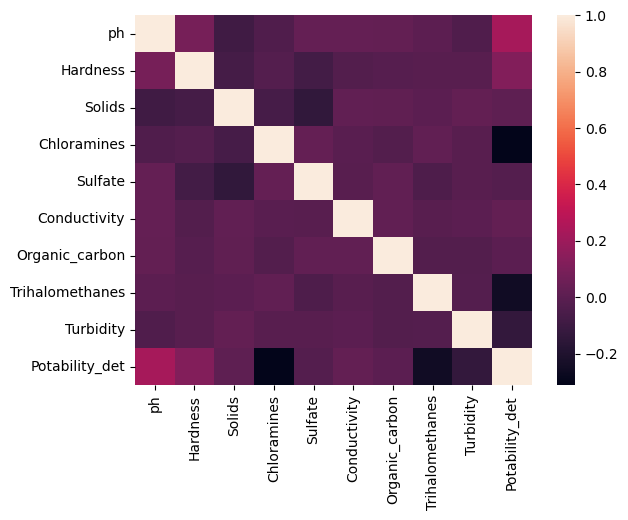

In [25]:
corr = df_.corr()

sns.heatmap(corr)
plt.show()

<Figure size 1000x800 with 0 Axes>

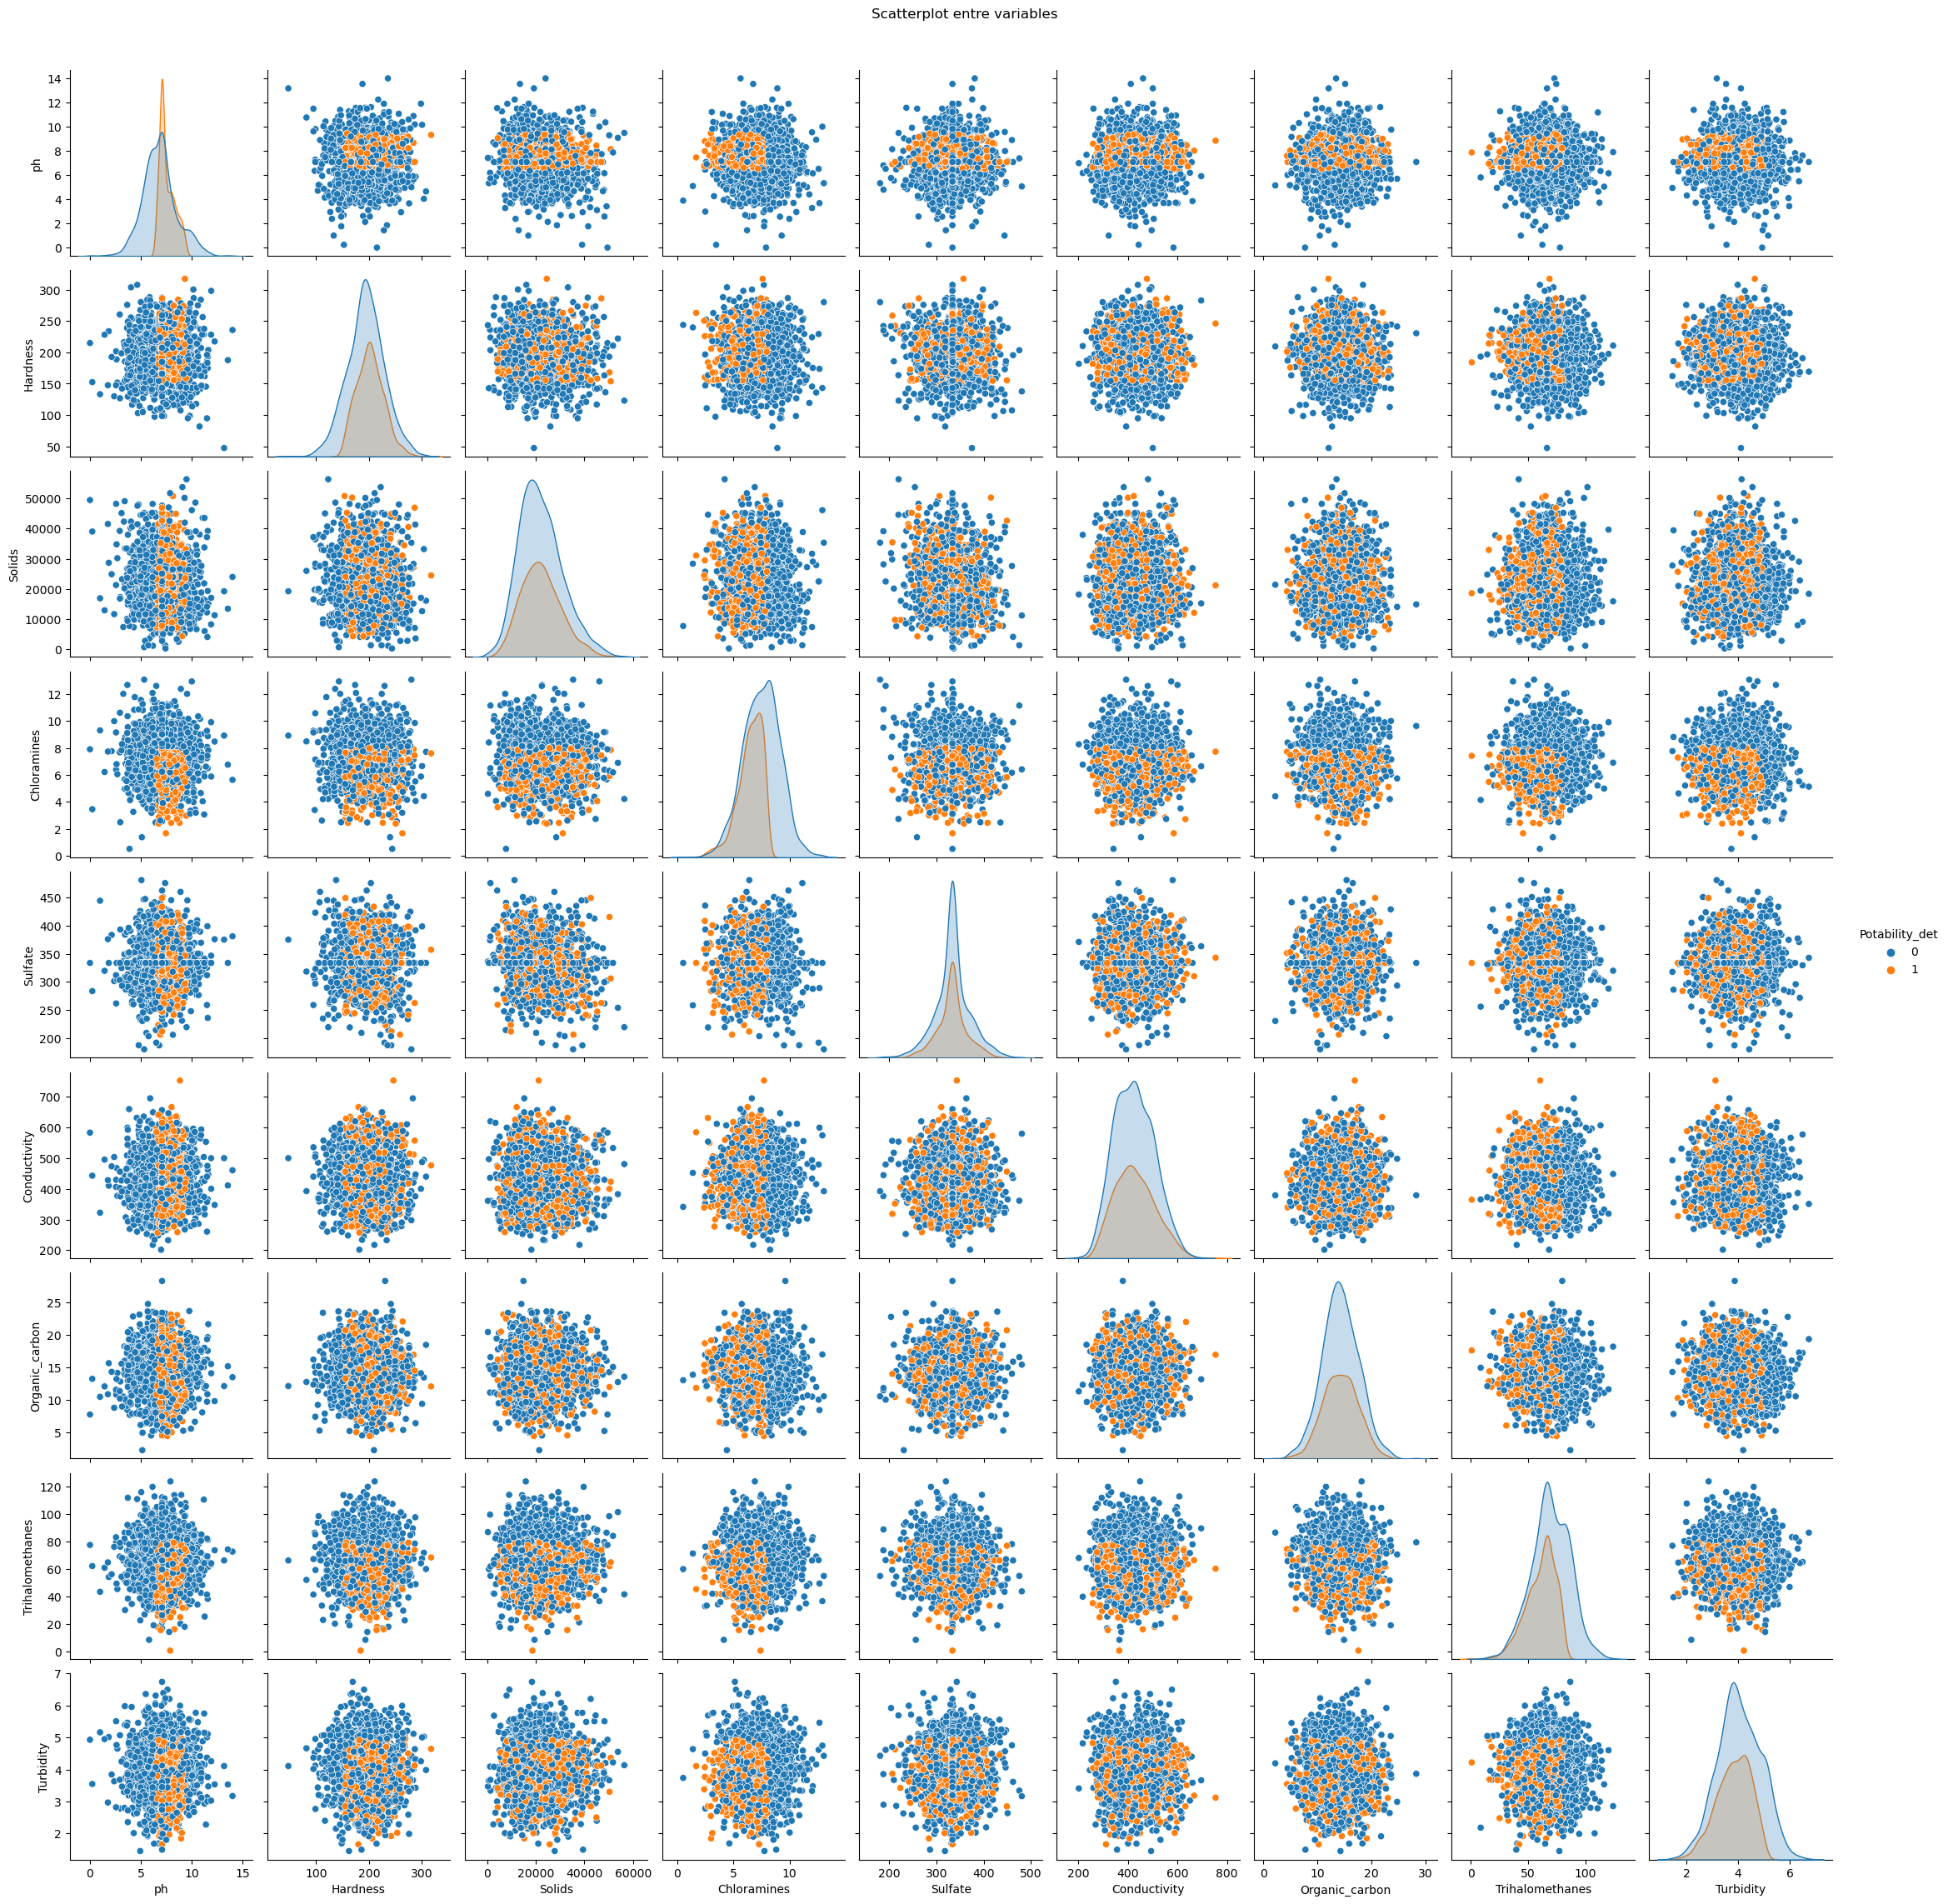

In [26]:
import warnings
warnings.filterwarnings('ignore')

# Create the pairplot
plt.figure(figsize=(10, 8))
sns.pairplot(df_, kind='scatter', hue='Potability_det')
plt.suptitle('Scatterplot entre variables', y=1.02)
plt.show()

On peut confirmer visuellement que nos valeurs sont très peu corrélées entres-elles. La majorité des scatterplot représentent des nuages de points confondus. On va tout de même essayer de réaliser de l'analyse dessus.

# ACP

PC1: 13.45%
PC2: 12.47%
PC3: 11.98%
PC4: 11.44%
PC5: 11.03%
PC6: 10.73%
PC7: 10.45%
PC8: 9.67%
PC9: 8.79%
Variance explained : 100.00000000000003


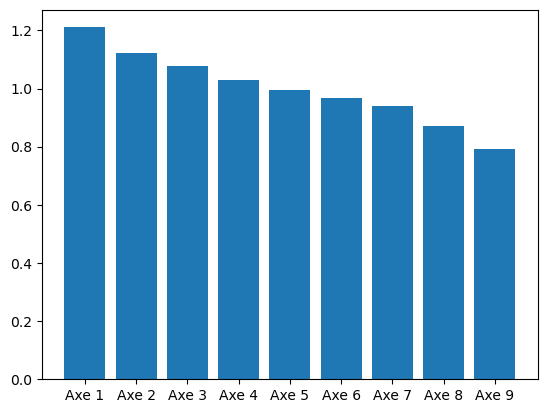

In [27]:
from sklearn.decomposition import PCA


#df_ = df.drop(['Potability_det', 'Unnamed: 0'], axis=1)
#df_ =df_.drop(['Potability'], axis=1)


cls = PCA(n_components=9)
pcs = cls.fit_transform(normalized_df)


variance_ratios = cls.explained_variance_ratio_
percentage_var_explained = variance_ratios * 100

plt.bar(["Axe 1","Axe 2","Axe 3","Axe 4","Axe 5","Axe 6","Axe 7","Axe 8","Axe 9"],cls.explained_variance_)

sum = 0
for i, variance_explained in enumerate(percentage_var_explained, start=1):
    print(f"PC{i}: {variance_explained:.2f}%")
    sum += variance_explained
print(f"Variance explained : {sum}")

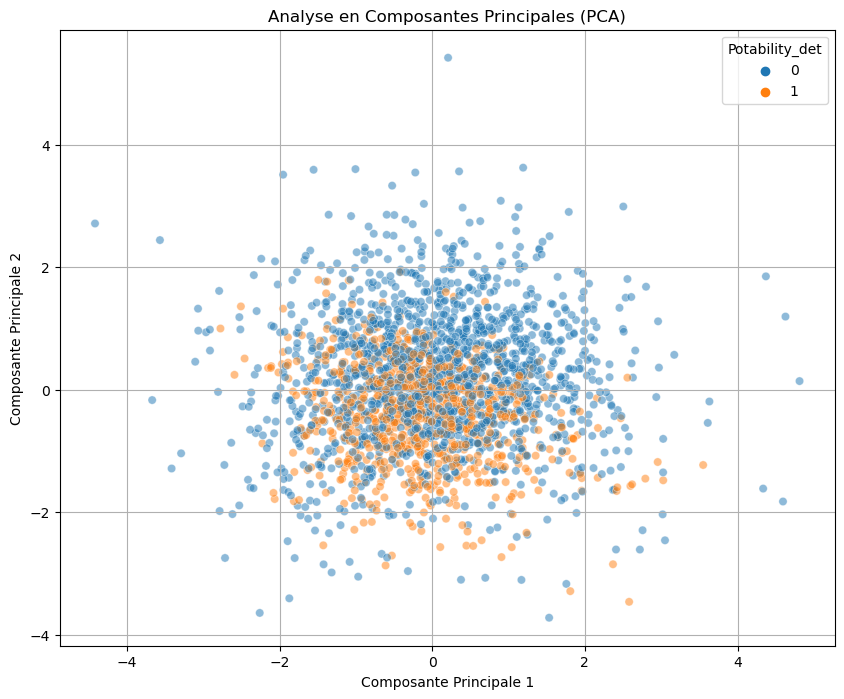

In [28]:
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(
    x=pcs[:, 0],
    y=pcs[:, 1],
    hue="Potability_det",
    data=df_,
    alpha=0.5  # Transparence

)
scatter.set_xlabel('Composante Principale 1')
scatter.set_ylabel('Composante Principale 2')
scatter.set_title('Analyse en Composantes Principales (PCA)')

plt.grid(True)


ph
Hardness
Solids
Chloramines
Sulfate
Conductivity
Organic_carbon
Trihalomethanes
Turbidity


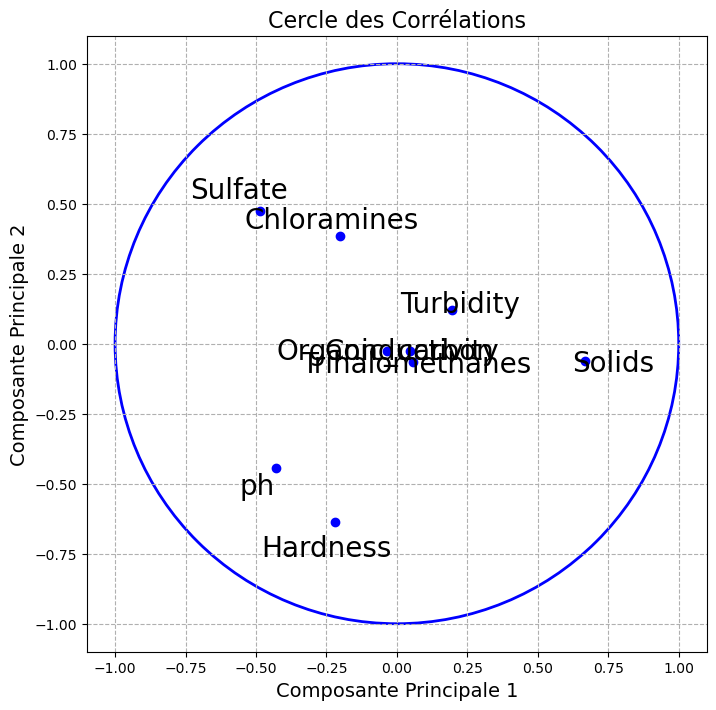

In [29]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Suppose cls is your PCA object with the components loaded
loadings = cls.components_.T

# Création du cercle de corrélation
fig, ax = plt.subplots(figsize=(8, 8))
# Utilisez ici le code hexadécimal de la couleur bleue que vous préférez
circle = plt.Circle((0, 0), 1, fill=False, color='blue', linewidth=2)
ax.add_artist(circle)

# Ajouter les points et les labels
for i in range(len(loadings)):
    print(df_.columns[i])
    ax.plot(loadings[i, 0], loadings[i, 1], 'o', color='blue')  # Utilisez la même couleur pour les points
    plt.text(loadings[i, 0] * 1.15, loadings[i, 1] * 1.15, df_.columns[i], color='black', ha='center', va='center', fontsize=20)  # Définir la taille de la police

# Définir les limites et les étiquettes
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
ax.set_xlabel('Composante Principale 1', fontsize=14)  # Définir la taille de la police
ax.set_ylabel('Composante Principale 2', fontsize=14)  # Définir la taille de la police
ax.set_title('Cercle des Corrélations', fontsize=16)  # Définir la taille de la police
#ax.axhline(0, color='grey', lw=1)
#ax.axvline(0, color='grey', lw=1)

# Afficher le graphique
plt.grid(True, linestyle='--')
plt.show()


## KMEANS SUR L'ACP


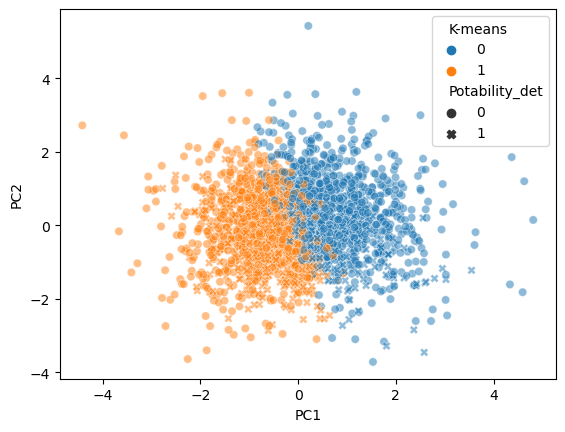

In [30]:
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
from utils import *


pcs_df = pd.DataFrame(pcs, columns=[f'PC{i+1}' for i in range(pcs.shape[1])])
cls = KMeans(n_clusters=2, init='k-means++')
cls.fit(pcs_df)

labels = pd.Series(cls.labels_, name="K-means")
scatterplot_pca(data=pcs_df, hue=labels, style=df_labels['Potability_det'],alpha=0.5)
plt.show()

# On quantifie avec l'indice de Rand


In [31]:
from sklearn.metrics import adjusted_rand_score

ari = adjusted_rand_score(df_labels['Potability_det'], cls.labels_)
print(f"L'indice de Rand ajusté est : {ari * 100} %")

L'indice de Rand ajusté est : 1.6742729391393651 %


On remarque un résultat extrêmement faible : 0.82% de bonnes précisions. Comme nous l'avions prévu, la méthode des Kmeans ne fonctionne pas bien


# K plus proches voisons

In [32]:
pcs_1_2_df = pcs_df[['PC1', 'PC2']]
pcs_1_2_df

PC1       PC2
0    -0.050221 -1.068316
1    -0.314837 -0.535197
2    -1.245838  2.066203
3    -0.648307 -0.877224
4    -1.016721  0.315927
...        ...       ...
2288  0.213585 -0.264271
2289  1.531651 -3.720154
2290 -0.517190 -0.163035
2291  0.442226  1.138653
2292 -0.116070  0.725999

[2293 rows x 2 columns]

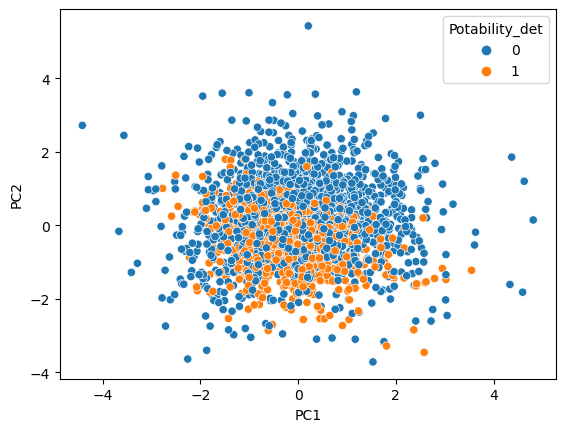

In [33]:

X = pcs_1_2_df
y = df_labels['Potability_det']

plot_clustering(X, y)
plt.show()

AttributeError: 'PathCollection' object has no attribute 'get_markerfacecolor'

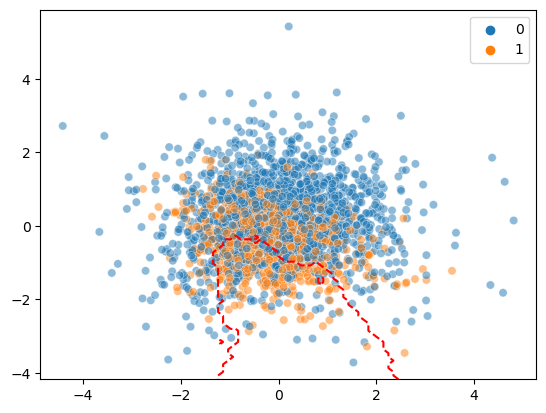

In [34]:
from sklearn.neighbors import KNeighborsClassifier

cls = KNeighborsClassifier(n_neighbors=251)
cls.fit(X, y)
scatter = sns.scatterplot(
    x=pcs[:, 0],
    y=pcs[:, 1],
    hue="Potability_det",
    data=df_labels,
    alpha=0.5  # Transparence

)
#plot_clustering(X, y)
add_decision_boundary(cls)
plt.show()

In [35]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(cls, X, y, cv=5)
scores.mean()

0.6877434331325931

In [36]:
from sklearn.model_selection import GridSearchCV

# De 1 à 500 voisins (exclu), échelle logarithmique
n_neighbors_list = np.unique(np.round(np.geomspace(1, 500, 100)).astype(int))
param_grid = {"n_neighbors": n_neighbors_list}

cls = KNeighborsClassifier()
search = GridSearchCV(cls, param_grid, scoring="accuracy", cv=10)
search.fit(X, y)
search.best_params_


{'n_neighbors': 251}

Résultats plutôt convaincants avec la méthode des KNN : jusqu'à 68% de bonnes prédictions !

# Théorie baysienne et analyse discriminante

Théorie baysienne :  Quand on connait la loi de notre dataset
Analyse discriminante: : Quand on a une variable qui suit une loi normale

Le test de Shapiro-Wilk est une méthode statistique utilisée pour vérifier si un échantillon de données suit une distribution normale

Calcul du Test de Shapiro-Wilk
Le test de Shapiro-Wilk calcule une statistique 𝑊
W qui mesure la similarité des données observées à une distribution normale. Cette statistique est basée sur les écarts entre les valeurs des données triées et les valeurs attendues si les données étaient normales

In [37]:
from scipy.stats import shapiro

for column in df_.columns:
    # Vérifier si la colonne contient des données numériques
    if pd.api.types.is_numeric_dtype(df_[column]):
        # Appliquer le test de Shapiro-Wilk
        stat, p = shapiro(df_[column])
        print(f'Test de normalité pour {column}:')
        print('Statistiques=%.3f, p-value=%.3f' % (stat, p))

        # Interprétation
        if p > 0.05:
            print("L'hypothèse de normalité ne peut pas être rejetée\n")
        else:
            print("L'hypothèse de normalité est rejetée\n")
    else:
        print(f'{column} est ignorée car non-numérique\n')

Test de normalité pour ph:
Statistiques=0.979, p-value=0.000
L'hypothèse de normalité est rejetée

Test de normalité pour Hardness:
Statistiques=0.997, p-value=0.000
L'hypothèse de normalité est rejetée

Test de normalité pour Solids:
Statistiques=0.983, p-value=0.000
L'hypothèse de normalité est rejetée

Test de normalité pour Chloramines:
Statistiques=0.997, p-value=0.000
L'hypothèse de normalité est rejetée

Test de normalité pour Sulfate:
Statistiques=0.962, p-value=0.000
L'hypothèse de normalité est rejetée

Test de normalité pour Conductivity:
Statistiques=0.991, p-value=0.000
L'hypothèse de normalité est rejetée

Test de normalité pour Organic_carbon:
Statistiques=0.999, p-value=0.575
L'hypothèse de normalité ne peut pas être rejetée

Test de normalité pour Trihalomethanes:
Statistiques=0.997, p-value=0.001
L'hypothèse de normalité est rejetée

Test de normalité pour Turbidity:
Statistiques=1.000, p-value=0.877
L'hypothèse de normalité ne peut pas être rejetée

Test de normalité

Nos variables ne suivent pas une loi normale, donc on peut a priori pas faire d'analyse discriminante

In [38]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
XACp = pcs_df[['PC1', 'PC2']]
yACp = df_['Potability_det']
# Sélectionner les variables d'origine
X = df_[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']]
y = df_['Potability_det']  # Utiliser la variable cible originale

# Diviser les données en ensembles d'entraînement et de test (80% entraînement, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Appliquer LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_lda)

# Afficher l'accuracy en pourcentage
print(f'Accuracy of LDA: {accuracy * 100:.2f}%')

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred_lda)
print("Matrice de confusion:")
print(conf_matrix)

# Calculer et afficher le rapport de classification
class_report = classification_report(y_test, y_pred_lda)
print("Rapport de classification:")
print(class_report)


Accuracy of LDA: 72.77%
Matrice de confusion:
[[258  36]
 [ 89  76]]
Rapport de classification:
              precision    recall  f1-score   support

           0       0.74      0.88      0.80       294
           1       0.68      0.46      0.55       165

    accuracy                           0.73       459
   macro avg       0.71      0.67      0.68       459
weighted avg       0.72      0.73      0.71       459



Ces résultats sont à analyser et à vérifier. Je sais pas si c'est j'ai bien effectué le travail.

Accuracy of LDA: 64.71%
Matrice de confusion:
[[270  24]
 [138  27]]
Rapport de classification:
              precision    recall  f1-score   support

           0       0.66      0.92      0.77       294
           1       0.53      0.16      0.25       165

    accuracy                           0.65       459
   macro avg       0.60      0.54      0.51       459
weighted avg       0.61      0.65      0.58       459



AttributeError: 'PathCollection' object has no attribute 'get_markerfacecolor'

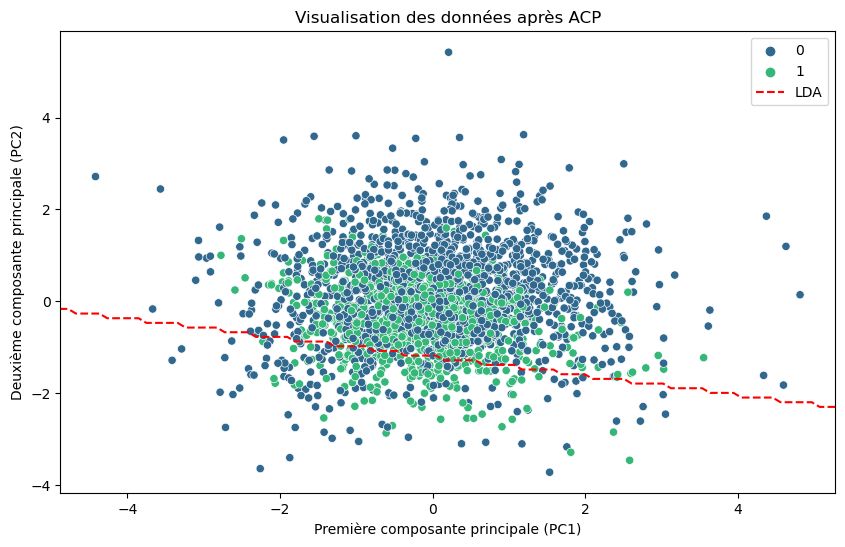

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

# Assurez-vous que pcs_df et df_ sont correctement définis avec vos données

# Sélectionner les variables d'origine
X = df_[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']]
y = df_['Potability_det']  # Utiliser la variable cible originale

# Standardiser les données avant d'appliquer l'ACP
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Appliquer l'ACP
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Diviser les données en ensembles d'entraînement et de test (80% entraînement, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Appliquer LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_lda)

# Afficher l'accuracy en pourcentage
print(f'Accuracy of LDA: {accuracy * 100:.2f}%')

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred_lda)
print("Matrice de confusion:")
print(conf_matrix)

# Calculer et afficher le rapport de classification
class_report = classification_report(y_test, y_pred_lda)
print("Rapport de classification:")
print(class_report)

# Créer un DataFrame avec les composantes principales et la variable cible
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Potability'] = y.values

# Visualisation
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x='PC1', y='PC2', hue='Potability', palette='viridis', data=pca_df)
plt.title('Visualisation des données après ACP')
plt.xlabel('Première composante principale (PC1)')
plt.ylabel('Deuxième composante principale (PC2)')
plt.legend(title='Potabilité')

# Ajout des frontières de décision
add_decision_boundary(lda, ax=ax, label='LDA', color='red')

# Afficher la figure
plt.show()


# Régression logistique

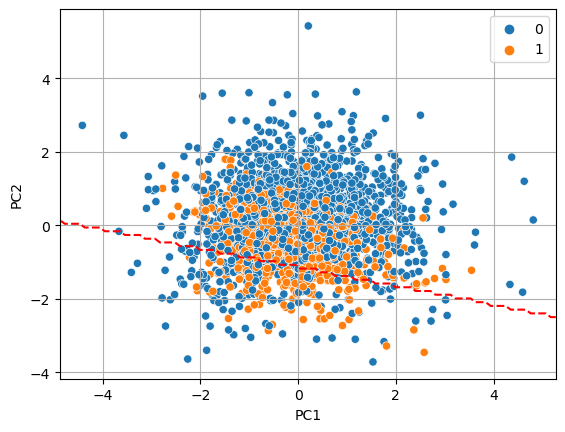

In [40]:




from sklearn.linear_model import LogisticRegression
X = pcs_1_2_df
y = df_labels['Potability_det']

cls = LogisticRegression(penalty=None)
cls = LogisticRegression(penalty=None)
cls.fit(X, y)
sns.scatterplot(x="PC1", y="PC2", hue=y, data=X)
add_decision_boundary(cls,region=False)

scatter.set_xlabel('Composante Principale 1')
scatter.set_ylabel('Composante Principale 2')
scatter.set_title('Analyse en Composantes Principales (PCA)')

plt.grid(True)


AttributeError: 'PathCollection' object has no attribute 'get_markerfacecolor'

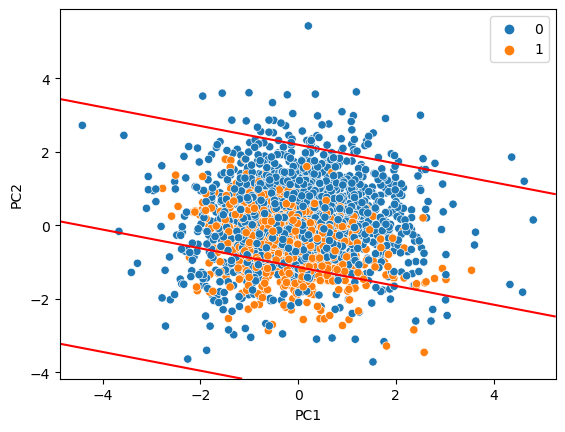

In [41]:
sns.scatterplot(x="PC1", y="PC2", hue=y, data=X)
levels = [.1, .5, .9]
add_decision_boundary(cls,region=False, levels=levels)
plt.show()


AttributeError: 'PathCollection' object has no attribute 'get_markerfacecolor'

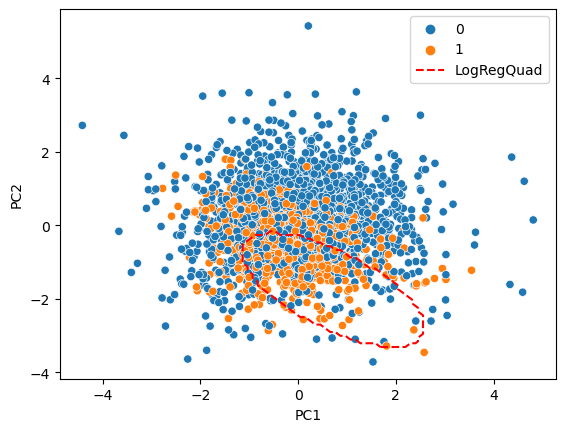

In [45]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
cls = LogisticRegression()
pipe = make_pipeline(poly, cls)
pipe.fit(X, y)
sns.scatterplot(x="PC1", y="PC2", hue=y, data=X)
add_decision_boundary(pipe, label="LogRegQuad")
plt.show()


In [46]:
 from sklearn.cluster import KMeans
cls = KMeans(n_clusters=20)
cls.fit(X)
centers = cls.cluster_centers_
from sklearn.metrics import pairwise_distances
Y = pairwise_distances(X, centers)


In [47]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import pairwise_distances
def distances_to_centers(centers, metric="euclidean"):
    def distances_to_centers0(X):
# Calcul des inter-distances entre `X` et `centers`
# <answer>
        return pairwise_distances(X, centers, metric=metric)
# </answer>
    return distances_to_centers0
# Fonction qui prend en argument un jeu de données et le transforme.
func = distances_to_centers(centers)
# Création d'un modèle Scikit-learn qui réalise la transformation
# voulue.
transformer = FunctionTransformer(func)

AttributeError: 'PathCollection' object has no attribute 'get_markerfacecolor'

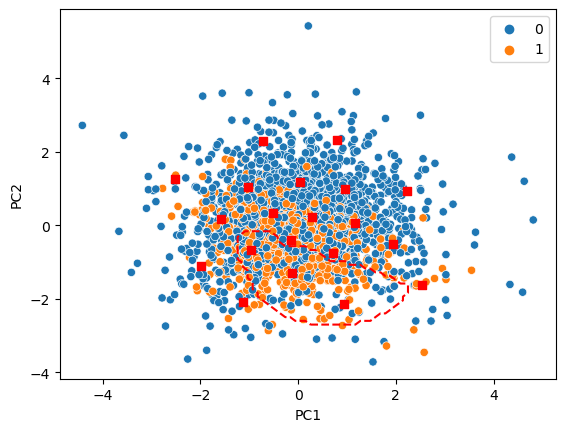

In [48]:
 from sklearn.pipeline import make_pipeline
pipe = make_pipeline(transformer, LogisticRegression())
pipe.fit(X, y)
ax =sns.scatterplot(x="PC1", y="PC2", hue=y, data=X)
plt.scatter(*centers.T, marker="s", c="r")
add_decision_boundary(pipe)
plt.show()


AttributeError: 'PathCollection' object has no attribute 'get_markerfacecolor'

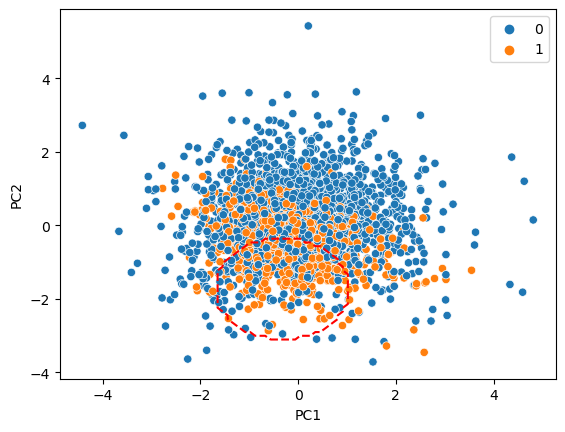

In [49]:
func = distances_to_centers(centers, metric="sqeuclidean")
transformer = FunctionTransformer(func)
pipe = make_pipeline(transformer, LogisticRegression())
pipe.fit(X, y)
sns.scatterplot(x="PC1", y="PC2", hue=y, data=X)
add_decision_boundary(pipe)
plt.show()


Pourcentage de bonne prédiction : 68.08%


AttributeError: 'PathCollection' object has no attribute 'get_markerfacecolor'

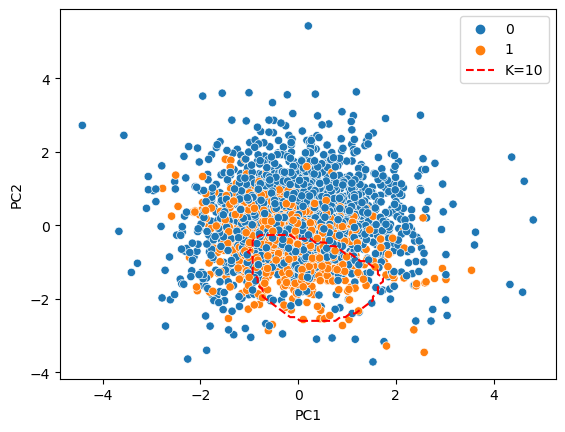

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

# Assurez-vous que CustomTransformer est correctement importé
from custom_transformer import CustomTransformer

# Chargement des données
X = pcs_1_2_df
y = df_labels['Potability_det']

# Création et entraînement du pipeline
pipe = make_pipeline(CustomTransformer(10), LogisticRegression())
pipe.fit(X, y)

# Prédiction sur les mêmes données pour calculer la précision (attention : utiliser les mêmes données pour la prédiction et l'entraînement donne une estimation trop optimiste)
y_pred = pipe.predict(X)
accuracy = accuracy_score(y, y_pred)
print(f"Pourcentage de bonne prédiction : {accuracy * 100:.2f}%")

# Visualisation des données et de la frontière de décision
sns.scatterplot(x="PC1", y="PC2", hue=y, data=X)
add_decision_boundary(pipe, label="K=10")
plt.show()


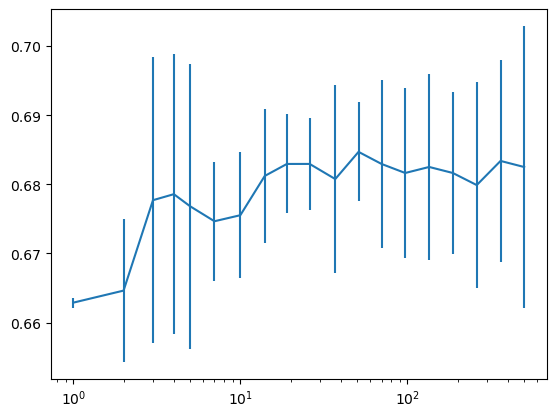

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
pipe = Pipeline([("tf", CustomTransformer(10)), ("logreg", LogisticRegression())])
n_clusters_list = np.unique(np.round(np.geomspace(1, 500, 20)).astype(int))
param_grid = {"tf__n_clusters": n_clusters_list}
search = GridSearchCV(pipe, param_grid, scoring="accuracy", cv=5)
search.fit(X, y)
search.best_params_
df = pd.DataFrame((
        dict(n_clusters=d["tf__n_clusters"], accuracy=e, std=s)
        for d, e, s in zip(
            search.cv_results_["params"],
            search.cv_results_["mean_test_score"],
            search.cv_results_["std_test_score"],
        )
    )
)
plt.errorbar(df["n_clusters"], df["accuracy"], yerr=df["std"])
plt.xscale("log")
plt.show()


AttributeError: 'PathCollection' object has no attribute 'get_markerfacecolor'

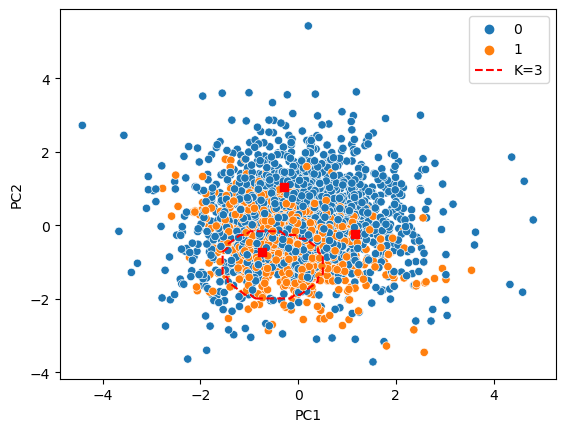

In [53]:
Kopt = df.loc[df.accuracy.idxmax(), "n_clusters"]
acc_opt = df.loc[df.accuracy.idxmax(), "accuracy"]
std_opt = df.loc[df.accuracy.idxmax(), "std"]
Kopt = min(df.loc[df.accuracy >= acc_opt - std_opt, "n_clusters"])
Kopt

pipe = make_pipeline(CustomTransformer(Kopt), LogisticRegression())
pipe.fit(X, y)
sns.scatterplot(x="PC1", y="PC2", hue=y, data=X)
centers = pipe[0].centers
plt.scatter(*centers.T, marker="s", c="r")
add_decision_boundary(pipe, label=f"K={Kopt}")
plt.show()


# Regression logistique non sur ACP


In [42]:
df = pd.read_csv('../../data/data_preprocessed.csv')
df_ = df.drop(['Potability', 'Unnamed: 0'], axis=1)
y = df_["Potability_det"]
x = df_.drop(["Potability_det"], axis=1)


In [43]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Charger les données


# Créer le modèle de régression logistique
logistic_regression = LogisticRegression(max_iter=1000)

# Appliquer la validation croisée
cv_scores = cross_val_score(logistic_regression, x, y, cv=5)

# Afficher les résultats
print(f"Validation croisée - Accuracy scores: {cv_scores}")
print(f"Moyenne de l'accuracy: {cv_scores.mean():.2f}")
print(f"Ecart-type de l'accuracy: {cv_scores.std():.2f}")


Validation croisée - Accuracy scores: [0.74945534 0.73638344 0.69934641 0.72707424 0.71179039]
Moyenne de l'accuracy: 0.72
Ecart-type de l'accuracy: 0.02


In [44]:
# Générer les termes quadratiques
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Créer le modèle de régression logistique
logistic_regression = LogisticRegression(max_iter=1000)

# Appliquer la validation croisée
cv_scores = cross_val_score(logistic_regression, X_poly, y, cv=5)

# Afficher les résultats
print(f"Validation croisée - Accuracy scores: {cv_scores}")
print(f"Moyenne de l'accuracy: {cv_scores.mean():.2f}")
print(f"Ecart-type de l'accuracy: {cv_scores.std():.2f}")

NameError: name 'PolynomialFeatures' is not defined

# Arbre de décision

Arbres de décision
Insensibilité à l'échelle : Les arbres de décision divisent les données en utilisant des seuils sur les valeurs des caractéristiques, ce qui les rend insensibles à l'échelle des caractéristiques.
Interprétabilité : Centraliser et normaliser les données peuvent rendre l'interprétation des seuils de division moins intuitive

Pruning de l'arbre de décision :
Les arbres de décision peuvent facilement surapprendre les données d'entraînement. Il est souvent recommandé d'élaguer (pruning) l'arbre pour éviter cela. Vous pouvez utiliser des paramètres comme max_depth, min_samples_split, min_samples_leaf, etc., pour contrôler la taille de l'arbre.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score





# Séparation des caractéristiques (X) et de la variable cible (y)
X = df_.drop('Potability_det', axis=1)
y = df_['Potability_det']

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Création et entraînement du modèle d'arbre de décision
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test)

# Calcul de l'exactitude
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on test set: {accuracy}')

# Cross-validation
cross_val_scores = cross_val_score(model, X, y, cv=5)
print(f'Cross-validation mean accuracy: {cross_val_scores.mean()}')
print(f'Cross-validation standard deviation: {cross_val_scores.std()}')


In [ ]:
X

In [ ]:
pcs_df = pd.DataFrame(pcs, columns=[f'PC{i+1}' for i in range(pcs.shape[1])])
pcs_df

X = pcs_df[['PC1', 'PC2']]
y = df_['Potability_det']

# Entraînement du modèle d'arbre de décision
model = DecisionTreeClassifier(random_state=42)
model.fit(X, y)

# Création d'une grille de points pour visualiser la frontière de décision
x_min, x_max = X['PC1'].min() - 1, X['PC1'].max() + 1
y_min, y_max = X['PC2'].min() - 1, X['PC2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Prédiction sur chaque point de la grille
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Visualisation des résultats
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X['PC1'], X['PC2'], c=y, s=20, edgecolor='k')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Decision Tree Classifier on PCA Components')
plt.show()

In [ ]:
X = pcs_df[['PC1', 'PC2']]
y = df_['Potability_det']

# Entraînement du modèle d'arbre de décision
model = DecisionTreeClassifier(random_state=42)

# Validation croisée pour obtenir l'accuracy moyenne
cross_val_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
accuracy_mean = cross_val_scores.mean()
accuracy_percentage = accuracy_mean * 100
print(f'Cross-validated Accuracy: {accuracy_percentage:.2f}%')

# Entraîner le modèle sur l'ensemble des données pour visualisation
model.fit(X, y)

# Création d'une grille de points pour visualiser la frontière de décision
x_min, x_max = X['PC1'].min() - 1, X['PC1'].max() + 1
y_min, y_max = X['PC2'].min() - 1, X['PC2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Prédiction sur chaque point de la grille
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Prédiction sur les points d'origine
y_pred = model.predict(X)

# Visualisation des résultats
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X['PC1'], X['PC2'], c=y_pred, s=20, edgecolor='k', cmap='coolwarm')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Decision Tree Classifier on PCA Components')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Séparation des caractéristiques (X) et de la variable cible (y)
X = df_.drop('Potability_det', axis=1)
y = df_['Potability_det']

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Création et entraînement du modèle d'arbre de décision avec élagage
model = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=10, min_samples_leaf=5)
model.fit(X_train, y_train)

# Prédiction sur l'ensemble d'entraînement
y_train_pred = model.predict(X_train)

# Calcul de l'exactitude sur l'ensemble d'entraînement
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Accuracy on training set: {train_accuracy}')

# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test)

# Calcul des métriques sur l'ensemble de test
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy on test set: {accuracy}')
print(f'Precision on test set: {precision}')
print(f'Recall on test set: {recall}')
print(f'F1 Score on test set: {f1}')

# Cross-validation
cross_val_scores = cross_val_score(model, X, y, cv=5)
print(f'Cross-validation mean accuracy: {cross_val_scores.mean()}')
print(f'Cross-validation standard deviation: {cross_val_scores.std()}')


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Séparation des caractéristiques (X) et de la variable cible (y)
#df = df.drop(['Unnamed: 0'], axis=1)
X = df.drop('Potability', axis=1)
y = df['Potability']

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Création et entraînement du modèle d'arbre de décision avec élagage
model = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=10, min_samples_leaf=5)
model.fit(X_train, y_train)

# Prédiction sur l'ensemble d'entraînement
y_train_pred = model.predict(X_train)

# Calcul de l'exactitude sur l'ensemble d'entraînement
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Accuracy on training set: {train_accuracy}')

# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test)

# Calcul des métriques sur l'ensemble de test
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy on test set: {accuracy}')
print(f'Precision on test set: {precision}')
print(f'Recall on test set: {recall}')
print(f'F1 Score on test set: {f1}')

# Cross-validation
cross_val_scores = cross_val_score(model, X, y, cv=5)
print(f'Cross-validation mean accuracy: {cross_val_scores.mean()}')
print(f'Cross-validation standard deviation: {cross_val_scores.std()}')


In [ ]:
df

# Régression multiple

In [ ]:
Potentiellement infaisable car nous avons une prédiction binaire

# Décision de Bayes

In [ ]:
df_
X = df_.drop('Potability_det', axis=1)
y = df_['Potability_det']
model = GaussianNB()

# Appliquer la validation croisée
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Calculer le taux d'erreur moyen
error_rate = 1 - cv_scores.mean()

print(f"Taux d'erreur de Bayes : {error_rate:.4f}")

In [ ]:
df
X = df.drop(['Potability_det','Potability'], axis=1)
y = df['Potability']
model = GaussianNB()

# Appliquer la validation croisée
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Calculer le taux d'erreur moyen
error_rate = 1 - cv_scores.mean()

print(f"Taux d'erreur de Bayes : {error_rate:.4f}")

In [ ]:
X

In [ ]:
df

In [ ]:
df = pd.read_csv('../../data/data_preprocessed.csv')
df_ = df.drop(['Potability', 'Unnamed: 0'], axis=1)
df_

In [ ]:
df_melted = pd.melt(df_.drop(columns=['Solids','Conductivity','Sulfate','Hardness','Trihalomethanes']), id_vars='Potability_det')

# Tracer les boxplots
plt.figure(figsize=(12, 8))
sns.boxplot(x='variable', y='value', hue='Potability_det', data=df_melted)
plt.title('Boxplots of Characteristics by Potability (excluding Solids)')
plt.xlabel('Characteristics')
plt.ylabel('Values')
plt.legend(title='Potability_det')
plt.xticks(rotation=45)
plt.tight_layout()

# Afficher le graphique
plt.show()